<a href="https://colab.research.google.com/github/javierespinozat/kaggle-competitions/blob/master/Kaggle_competition_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I) Problem definition and technique selection**

From Kaggle's definition of competition: "house prices: Advanced Regression Techniques":

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

 "Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home." *


> Objective

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

> Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

>Technique

**For study purposes of the author, Feed Forward Neural Network is selected as technique.**




In [0]:
#set up kaggle.com API
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

!kaggle competitions download -c house-prices-advanced-regression-techniques

kaggle.json
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 66.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 8.55MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 68.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 61.7MB/s]


kaggle.json
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!cat train.csv | wc -l

1461


In [0]:
!cat test.csv | wc -l

1460


In [0]:
!head -5 train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [0]:
!head -5 test.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No

In [0]:
%tensorflow_version 2.x
!pip install -q keras==2.3.0
import tensorflow as tf
import keras
from keras.utils import normalize
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import pandas as pd
import numpy as np


from keras.utils import plot_model
import matplotlib
import matplotlib.pyplot as plt

!pip install -q livelossplot
from livelossplot import PlotLossesKeras

from time import time

%matplotlib inline

In [0]:
!pip install -q livelossplot
from livelossplot import PlotLossesKeras

from time import time

In [0]:
#standard plot settings

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

COLOR = 'red'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [0]:
df_train = pd.read_csv('train.csv', sep = ',')
df_train0 = df_train.copy()
df_train0.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [0]:
x_predict = pd.read_csv('test.csv', sep=',')
print(len(x_predict))
x_predict.head()

1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
#provided data seems just splitted
x_predict_ids = x_predict['Id'].copy()

In [0]:
#copy of the original target and it's Id
df_train0_id_target = df_train0[['Id', 'SalePrice']].copy()

In [0]:
del df_train0['SalePrice']

In [0]:
df_train0.columns == x_predict.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [0]:
#all data is put together for feature selection. identification is on 'Id' label, so the the original "test.csv" data can be popped 
df_train0 = df_train0.append(x_predict)

In [0]:
#google facet's overview is a really cool tool for inspection
!pip install -q facets-overview

In [0]:
from IPython.core.display import display, HTML
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'df_train0', 'table': df_train0}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [0]:
def heat_map_corr(df):

  df_corr = df.corr()
  f = plt.figure(figsize=(10, 10))
  plt.matshow(np.abs(df_corr), fignum=f.number)
  plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10, rotation=90)
  plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=14)
  plt.title('Correlation Matrix \n\n\n\n', fontsize=16);

  return plt.show(), display(df_corr)


defining RMSE metric,as prescribed

In [0]:
import keras.backend as K

def rmse(y_true, y_pred):
    rmse = K.sqrt(K.mean(K.square(y_true-y_pred)))
    return rmse

# **MODEL VERSION 3**

After several data featurings and models, this is the best that could be achieved given the time set for it.

* NaN values will be processed: imputed or destroyed.
* non-notmalized predictors
* One-hot cat
* scaled target to e-log


In [0]:
df_train_v3 = df_train0.copy()
df_train_v3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


, NaN values in cols are as follows:

In [0]:
print('df_train_v3\'s len: ', len(df_train_v3), '\n\n')


df_train_v3's len:  2919 




259 events are NaN on LotFrontage (Linear feet of street connected to property) could be imputed from the total property area LotArea (Lot size in square feet) suposing a it has a squared shape -as usual-. But, first let's check if this two labels data are correlated

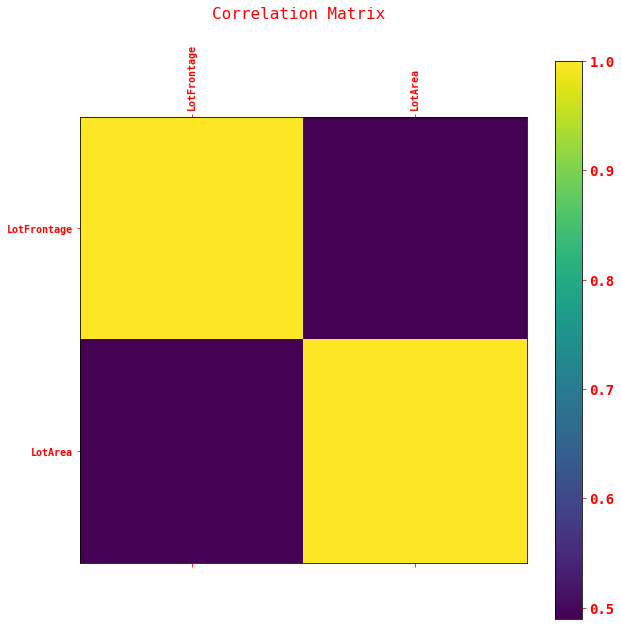

,LotFrontage,LotArea
LotFrontage,1.000000,0.489896
LotArea,0.489896,1.000000


(None, None)

In [0]:
token = df_train_v3[['LotFrontage','LotArea']].dropna()
heat_map_corr(token)

correlation is significant, but not complete. missing data will be imputed as if total area where in a squared shape

In [0]:
df_train_v3['LotFrontage'].fillna(np.sqrt(df_train_v3['LotArea']), axis = 0, inplace = True)
df_train_v3[['LotFrontage']].isna().sum()

LotFrontage    0
dtype: int64

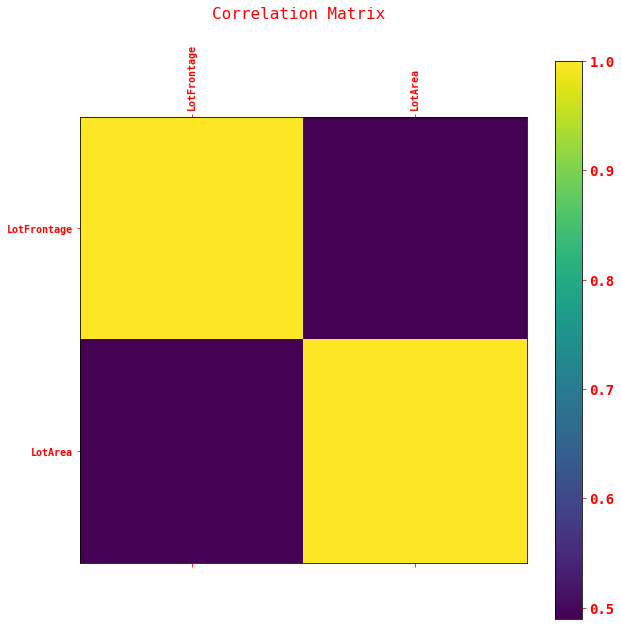

,LotFrontage,LotArea
LotFrontage,1.000000,0.489896
LotArea,0.489896,1.000000


(None, None)

In [0]:
heat_map_corr(token)

imputing data didn't changed correlation.

Alley (Type of alley access) has 1369 NaN values.

In [0]:
df_train_v3['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

from data description we have

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
Alley access is a singular condition for a property. This suggest that the NaN values could be just empty field.

he one hot method pd.get_dummies ignores NaN, so it would be better to change NaN to 'NA', meaning 'No Alley Access'

In [0]:
df_train_v3['Alley'].fillna('NA', axis = 0, inplace = True)
df_train_v3['Alley'].isna().sum()

0

MasVnrType  has 8 NaN. The description is as follows:

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

8 data is insignificant, but this mean also to drop all others labels, for this. So it will be imputed as None.

In [0]:
df_train_v3['MasVnrType'].fillna('None', axis = 0, inplace = True)
df_train_v3['MasVnrType'].isna().sum()

0

MasVnrArea  has 8 NaN. 

MasVnrArea: Masonry veneer area in square feet


In [0]:
df_train_v3['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

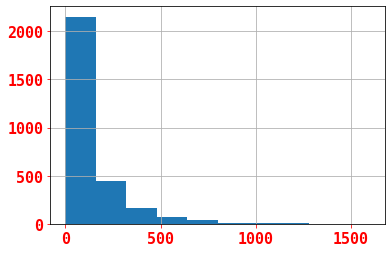

In [0]:
df_train_v3['MasVnrArea'].hist(bins = 10)

by far, most data is coupled into bin 0. NaNs will be imputed.

In [0]:
df_train_v3['MasVnrArea'].fillna(0, axis = 0, inplace = True)
df_train_v3['MasVnrArea'].isna().sum()

0

BsmtQual has 37 NaN records. Field description is as follows

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement


so it is a categorical field. This NaN should be contrasted with the other basement data, maybe this are juts empty fields for properties that doesn't have basement.

Checking other columns:



In [0]:
Bsmt = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath']
print(Bsmt)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath']


In [0]:
token = df_train_v3[Bsmt]
display(len(token[token['BsmtQual'].isnull()]))
token[token['BsmtQual'].isnull()]

81

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1343,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1344,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1364,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1431,NaN,NaN,NaN,NaN,NaN,0.0,0.0


only NaN and 0's.

TotalBsmtSF: Total square feet of basement area

means that basement has 0 square feet. meaning that the NaN values actually should be of the 'No Basement kind'

Now, definiions are

BsmtQual: Evaluates the height of the basement

       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       NA	No Basement


all the NaN containing columns, of the Bsmt class, have the same key for 'No Basement'. This simplify the imputation for this columns.

In [0]:
for i  in Bsmt:
  df_train_v3[i].fillna('NA', axis = 0, inplace = True)

In [0]:
token = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
for i  in token:
  df_train_v3[i].fillna(0, axis = 0, inplace = True)

In [0]:
for i  in Bsmt+token:
  print(i, ' : ', df_train_v3[i].isnull().sum())

BsmtQual  :  0
BsmtCond  :  0
BsmtExposure  :  0
BsmtFinType1  :  0
BsmtFinType2  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
BsmtFinSF1  :  0
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0


So, the 'Bsmt' class of labels has no NaN.

'Electrical' column records contain 1 NaN. The data Description is as follows:
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed




In [0]:
df_train_v3[df_train_v3['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal


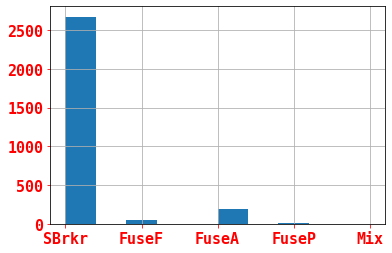

In [0]:
df_train_v3['Electrical'].hist()

most of the cases are 'SBrkr', so this unique case will be set to the mayority.

In [0]:
df_train_v3['Electrical'].fillna('SBrkr', axis = 0, inplace = True)

FireplaceQu has 690 amount of NaN values. Data description is as follows:

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

And has at least two more of the 'fireplace' kind:

Fireplaces: Number of fireplaces



so we can check if for this NaN values is or not a fireplace

In [0]:
df_train_v3['Fireplaces'].unique()

array([0, 1, 2, 3, 4])

In [0]:
df_train_v3['Fireplaces'].isnull().sum()

0

In [0]:
token = df_train_v3[['Fireplaces', 'FireplaceQu']]
token = token[token['FireplaceQu'].isnull()]
len(token)

1420

In [0]:
token['Fireplaces'].dtype

dtype('int64')

, so we know there are 4 unique possible values for 'Fireplaces', and that are integers. So if we sum the column filtered wih 'FireplaceQu' NaN, we can know if this NaN are due to nonexistant fireplaces to report a quality for.

In [0]:
token['Fireplaces'].sum()

0

, so this can be replaced with a 'NA' string, according to documentation.

In [0]:
df_train_v3['FireplaceQu'].fillna('NA', axis = 0, inplace = True)
df_train_v3['FireplaceQu'].isnull().sum()

0

There are labels of the 'garage' type that have the same number of NaN records, so this will be examined altogether.

GarageType   81

GarageYrBlt   81

GarageFinish   81

GarageQual   81

GarageCond   81

, generaly in this DB there is a column that can indicate the existance of a item, such as a Garage. So this will be examined first.

In [0]:
token = df_train_v3.columns
Garage = []
for i in range(len(token)):
  if ('Garage' in token[i]):
    Garage.append(token[i]) 
print(Garage)
print('Garage type len: ',len(Garage))

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
Garage type len:  7


'GarageArea' has no NaN, this can be of use.

In [0]:
token = df_train_v3[Garage]
token = token[token['GarageType'].isnull()]
token

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1449,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1453,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1454,NaN,NaN,NaN,0.0,0.0,NaN,NaN


the sum of Garage Area will show any singular case, if sum is 0 then all characterizations of Garage naturale are not applyable and thi NaN will be imputed as of the 'NA' kind.

In [0]:
token['GarageArea'].sum()

0.0

In [0]:
token['GarageCars'].sum()

0.0

there are no cases where there is a valid value for GarageArea but no Garage characterization. So replacemente must be done according to data description, as follows:

GarageType: Garage location

       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       NA	No Garage
		
GarageCond: Garage condition

       NA	No Garage

and the labels that present NaN are 

      [GarageType,	GarageYrBlt,	GarageFinish,	GarageQual, GarageCond]


and it is the case that

        GarageYrBlt

is not cathegorical. so tis will be check appart.

In [0]:
#categorical
Garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

for i  in Garage:
  df_train_v3[i].fillna('NA', axis = 0, inplace = True)

In [0]:
df_train_v3[Garage].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

and now, the 

     GarageYrBlt

case

In [0]:
token = df_train_v3[['GarageYrBlt', 'GarageArea']]
token[token['GarageYrBlt'].isnull()]

,GarageYrBlt,GarageArea
39,NaN,0.0
48,NaN,0.0
78,NaN,0.0
88,NaN,0.0
89,NaN,0.0
...,...,...
1433,NaN,0.0
1449,NaN,0.0
1453,NaN,0.0
1454,NaN,0.0


This is actually a problem because how to represent that it is not built in any year, in a numerical data.

In [0]:
display(token['GarageYrBlt'].unique())

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

if the NaN is replaced by 0, it would mean that it is less important, but that isn't the case.

One alternative is to one-hot this column and delete the nan.(pd.get_dummies just ignore NaN)

another alternative is impute the mean of the 'GarageYrBlt', and let the label to be ordinal as it should be.

nother alternative is to estimate the correlation in between 'SalePrice' and the 'GarageYrBlt' without the NaN and then use, for example, the year average for replacing the NaN and estimate correlation again. why this can be of use? because the amount of rows is 81 over 1300 aprox. and that the degrees of freedom resultant from the one-hot method do multiply the amount of input data in a significant way.

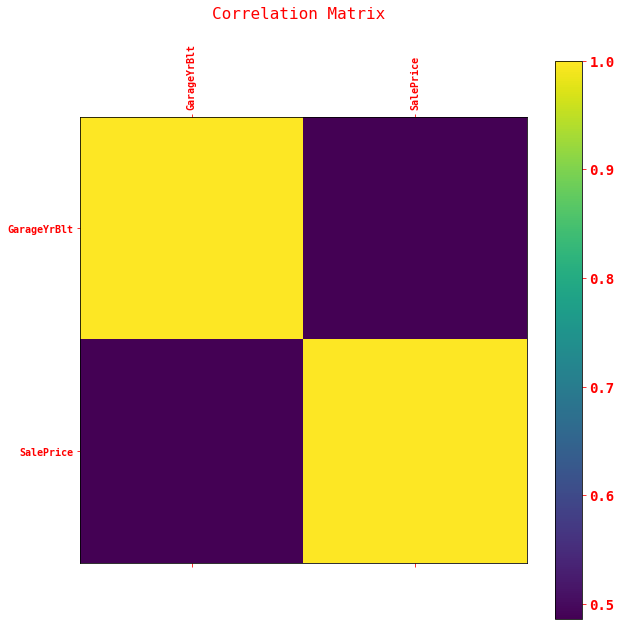

,GarageYrBlt,SalePrice
GarageYrBlt,1.000000,0.486362
SalePrice,0.486362,1.000000


1978.1134057971014

In [0]:
token = df_train[['GarageYrBlt', 'SalePrice']].dropna()
heat_map_corr(token)


Garage_mean = df_train_v3['GarageYrBlt'].mean()

display(Garage_mean)


replacing by 0 there is a significant change in the nature of both variables relation. so it is better to replace the NaN values using the media.

In [0]:
df_train_v3['GarageYrBlt'].fillna(Garage_mean, axis = 0, inplace = True)

PoolQC has 1453 events in NaN. Similarties are:

In [0]:
token = df_train_v3.columns
Pool = []
for i in range(len(token)):
  if ('Pool' in token[i]):
    Pool.append(token[i]) 
print(Pool)
print('Pool type len: ',len(Pool))

['PoolArea', 'PoolQC']
Pool type len:  2


The documentation for this is as follows:

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

In [0]:
token = df_train_v3[Pool]
token[token['PoolQC'].isnull()]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1454,0,NaN
1455,0,NaN
1456,0,NaN
1457,0,NaN


In [0]:
token = df_train_v3[Pool]
token[token['PoolQC'].isnull()].sum()

PoolArea    1373.0
PoolQC         0.0
dtype: float64

In [0]:
df_train_v3['PoolQC'].fillna('NA', axis = 0, inplace = True)

in the same way,

Fence: 1179

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


In [0]:
token = df_train_v3.columns
Fence = []
for i in range(len(token)):
  if ('Fence' in token[i]):
    Fence.append(token[i]) 
print(Fence)
print('Fence type len: ',len(Fence))

['Fence']
Fence type len:  1


Too many missing data, but it is more likely to be NA

In [0]:
df_train_v3['Fence'].fillna('NA', axis = 0, inplace = True)

and,

MiscFeature: 1406

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

In [0]:
token = df_train_v3.columns
Misc = []
for i in range(len(token)):
  if ('Misc' in token[i]):
    Misc.append(token[i]) 
print(Misc)
print('Misc type len: ',len(Misc))

['MiscFeature', 'MiscVal']
Misc type len:  2


In [0]:
token = df_train_v3[Misc]
token[token['MiscFeature'].isnull()].sum()

MiscFeature        0.0
MiscVal        17000.0
dtype: float64

In [0]:
df_train_v3['MiscFeature'].fillna('NA', axis = 0, inplace = True)

checking the results

In [0]:
proto = gfsg.ProtoFromDataFrames([{'name': 'df_train_v3', 'table': df_train_v3}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))




In [0]:
#hay na en la data para predecir?
token1 = df_train_v3[1460:].copy()
token = df_train_v3[1460:].dropna().copy()
len(token1) - len(token)
token3 = []
for i in token1.columns:
  if token1[i].isna().any() == True:
    token3.append(i)
print(token3)


['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

4

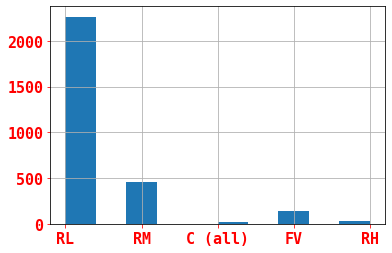

In [0]:
display(df_train_v3['MSZoning'].isna().sum())
df_train_v3['MSZoning'].hist()


most zones are RL, and 4 records are missiog, this will be just imputed.

In [0]:
df_train_v3['MSZoning'].fillna('RL', axis = 0, inplace = True)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

2

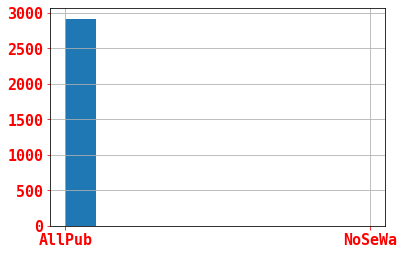

In [0]:
display(df_train_v3['Utilities'].isna().sum())
df_train_v3['Utilities'].hist()

In [0]:
df_train_v3['Utilities'].fillna('AllPub', axis = 0, inplace = True)

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

1

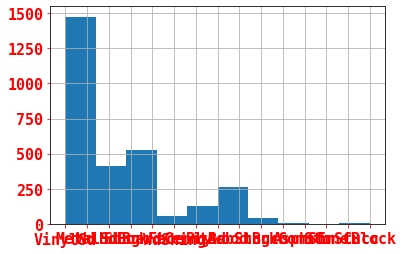

In [0]:
display(df_train_v3['Exterior1st'].isna().sum())
df_train_v3['Exterior1st'].hist()


In [0]:
df_train_v3['Exterior1st'].fillna('VinylSd', axis = 0, inplace = True)

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

1

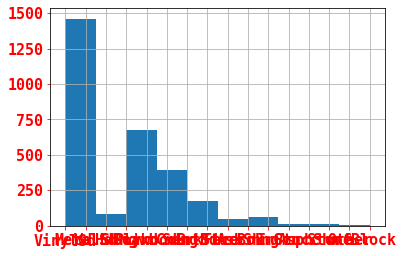

In [0]:
display(df_train_v3['Exterior2nd'].isna().sum())
df_train_v3['Exterior2nd'].hist()

In [0]:
df_train_v3['Exterior2nd'].fillna('VinylSd', axis = 0, inplace = True)

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

1

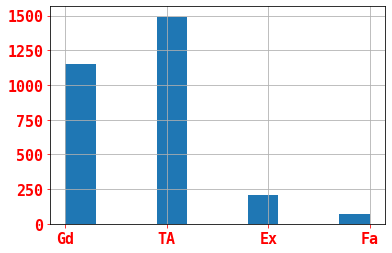

In [0]:
display(df_train_v3['KitchenQual'].isna().sum())
df_train_v3['KitchenQual'].hist()

In [0]:
df_train_v3['KitchenQual'].fillna('TA', axis = 0, inplace = True)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

2

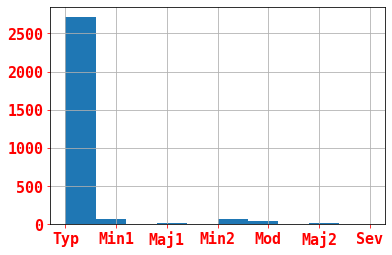

In [0]:
display(df_train_v3['Functional'].isna().sum())
df_train_v3['Functional'].hist()

In [0]:
df_train_v3['Functional'].fillna('Typ', axis = 0, inplace = True)

GarageCars: Size of garage in car capacity


In [0]:
display(df_train_v3['GarageCars'].isna().sum())
df_train_v3['GarageCars'].describe()

1

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [0]:
df_train_v3['GarageCars'].fillna(2, axis = 0, inplace = True)

GarageArea: Size of garage in square feet


In [0]:
display(df_train_v3['GarageArea'].isna().sum())
df_train_v3['GarageArea'].describe()

1

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [0]:
df_train_v3['GarageArea'].fillna(473, axis = 0, inplace = True)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

1

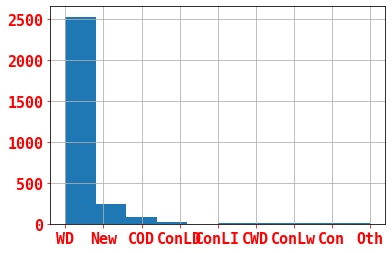

In [0]:
display(df_train_v3['SaleType'].isna().sum())
df_train_v3['SaleType'].hist()

In [0]:
df_train_v3['SaleType'].fillna('WD', axis = 0, inplace = True)

featuring seems done. Let's check the entire df

In [0]:
token1 = df_train_v3.copy()
token = df_train_v3.dropna().copy()
display(len(token1) - len(token))
token3 = []
for i in token1.columns:
  if token1[i].isna().any() == True:
    token3.append(i)
print(token3)

0

[]


seems ok.

In [0]:
df_train_v3_1 = df_train_v3.copy()

In [0]:
for i  in df_train_v3_1.columns:
  print(i,': ',df_train_v3_1[i].dtype)

Id :  int64
MSSubClass :  int64
MSZoning :  object
LotFrontage :  float64
LotArea :  int64
Street :  object
Alley :  object
LotShape :  object
LandContour :  object
Utilities :  object
LotConfig :  object
LandSlope :  object
Neighborhood :  object
Condition1 :  object
Condition2 :  object
BldgType :  object
HouseStyle :  object
OverallQual :  int64
OverallCond :  int64
YearBuilt :  int64
YearRemodAdd :  int64
RoofStyle :  object
RoofMatl :  object
Exterior1st :  object
Exterior2nd :  object
MasVnrType :  object
MasVnrArea :  float64
ExterQual :  object
ExterCond :  object
Foundation :  object
BsmtQual :  object
BsmtCond :  object
BsmtExposure :  object
BsmtFinType1 :  object
BsmtFinSF1 :  float64
BsmtFinType2 :  object
BsmtFinSF2 :  float64
BsmtUnfSF :  float64
TotalBsmtSF :  float64
Heating :  object
HeatingQC :  object
CentralAir :  object
Electrical :  object
1stFlrSF :  int64
2ndFlrSF :  int64
LowQualFinSF :  int64
GrLivArea :  int64
BsmtFullBath :  object
BsmtHalfBath :  object
Fu

In [0]:
#select the features to one hot
txt = open('data_description.txt', 'r')
print(txt.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [0]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
               'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
               'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
               'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

In [0]:
for i  in df_train_v3_1.columns:
  print(i,': ',df_train_v3_1[i].dtype)

Id :  int64
MSSubClass :  int64
MSZoning :  object
LotFrontage :  float64
LotArea :  int64
Street :  object
Alley :  object
LotShape :  object
LandContour :  object
Utilities :  object
LotConfig :  object
LandSlope :  object
Neighborhood :  object
Condition1 :  object
Condition2 :  object
BldgType :  object
HouseStyle :  object
OverallQual :  int64
OverallCond :  int64
YearBuilt :  int64
YearRemodAdd :  int64
RoofStyle :  object
RoofMatl :  object
Exterior1st :  object
Exterior2nd :  object
MasVnrType :  object
MasVnrArea :  float64
ExterQual :  object
ExterCond :  object
Foundation :  object
BsmtQual :  object
BsmtCond :  object
BsmtExposure :  object
BsmtFinType1 :  object
BsmtFinSF1 :  float64
BsmtFinType2 :  object
BsmtFinSF2 :  float64
BsmtUnfSF :  float64
TotalBsmtSF :  float64
Heating :  object
HeatingQC :  object
CentralAir :  object
Electrical :  object
1stFlrSF :  int64
2ndFlrSF :  int64
LowQualFinSF :  int64
GrLivArea :  int64
BsmtFullBath :  object
BsmtHalfBath :  object
Fu

to sum up, we have now the featured data and using the 'test.csv' Id this entire data can be popped.

In [0]:
df_train_v3_1[categorical] = df_train_v3_1[categorical].astype('O')
for i  in df_train_v3_1[categorical]:
  print(i,': ',df_train_v3_1[i].dtype)

MSSubClass :  object
MSZoning :  object
Street :  object
Alley :  object
LotShape :  object
LandContour :  object
Utilities :  object
LotConfig :  object
LandSlope :  object
Neighborhood :  object
Condition1 :  object
Condition2 :  object
BldgType :  object
HouseStyle :  object
RoofStyle :  object
RoofMatl :  object
Exterior1st :  object
Exterior2nd :  object
MasVnrType :  object
ExterQual :  object
ExterCond :  object
Foundation :  object
BsmtQual :  object
BsmtCond :  object
BsmtExposure :  object
BsmtFinType1 :  object
BsmtFinType2 :  object
Heating :  object
HeatingQC :  object
CentralAir :  object
Electrical :  object
KitchenQual :  object
Functional :  object
FireplaceQu :  object
GarageType :  object
GarageFinish :  object
GarageQual :  object
GarageCond :  object
PavedDrive :  object
PoolQC :  object
Fence :  object
MiscFeature :  object
MoSold :  object
SaleType :  object
SaleCondition :  object


In [0]:
for i  in df_train_v3_1.columns:
  print(i,': ',df_train_v3_1[i].dtype)

Id :  int64
MSSubClass :  object
MSZoning :  object
LotFrontage :  float64
LotArea :  int64
Street :  object
Alley :  object
LotShape :  object
LandContour :  object
Utilities :  object
LotConfig :  object
LandSlope :  object
Neighborhood :  object
Condition1 :  object
Condition2 :  object
BldgType :  object
HouseStyle :  object
OverallQual :  int64
OverallCond :  int64
YearBuilt :  int64
YearRemodAdd :  int64
RoofStyle :  object
RoofMatl :  object
Exterior1st :  object
Exterior2nd :  object
MasVnrType :  object
MasVnrArea :  float64
ExterQual :  object
ExterCond :  object
Foundation :  object
BsmtQual :  object
BsmtCond :  object
BsmtExposure :  object
BsmtFinType1 :  object
BsmtFinSF1 :  float64
BsmtFinType2 :  object
BsmtFinSF2 :  float64
BsmtUnfSF :  float64
TotalBsmtSF :  float64
Heating :  object
HeatingQC :  object
CentralAir :  object
Electrical :  object
1stFlrSF :  int64
2ndFlrSF :  int64
LowQualFinSF :  int64
GrLivArea :  int64
BsmtFullBath :  object
BsmtHalfBath :  object
F

In [0]:
df_train_v3_2 = pd.get_dummies(df_train_v3_1, prefix=None, prefix_sep = '_', columns = None, dtype = 'float64' )
display(df_train_v3_2.head())
print('\n')
display(len(df_train_v3_2))

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2006,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


2919

In [0]:
#rebuilding the data for prediction
x_predict_ids.head(2)


0    1461
1    1462
Name: Id, dtype: int64

In [0]:
x_predict = df_train_v3_2[1460:].copy()
x_predict.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,2010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,2010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
(len(x_predict.columns.unique()))

336

In [0]:
df_train_v3_2 = df_train_v3_2[:1460].copy()
df_train_v3_2 = df_train_v3_2.merge(df_train0_id_target, on = 'Id', how = 'left')
df_train_v3_2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2006,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,2008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [0]:
len(df_train_v3_2)

1460

In [0]:
del df_train_v3_2['Id']

In [0]:
#calling the target to e-based log:
df_train_v3_2['SalePrice'] = np.log(df_train_v3_2['SalePrice'])
df_train_v3_2['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

304 degrees of freedom and 1460 rows.

splitting the data:

In [0]:
#split data
x_train_v3 = df_train_v3_2.sample(frac=0.8, random_state=1)
x_test_v3 = df_train_v3_2.drop(x_train_v3.index)

#pop targets
y_train_v3 = x_train_v3.pop('SalePrice').to_frame()
y_test_v3 = x_test_v3.pop('SalePrice').to_frame()

modeling the NN

In [0]:
from keras import regularizers

In [0]:
def model_regression_v3():

  model = keras.models.Sequential()
  model.add(Dense(train_n_cols, kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal', activation='relu', input_shape = ((train_n_cols),)))

  model.add(Dense(1000, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal', activity_regularizer = regularizers.l1(1*10**(-4))))
  #model.add(Dropout(0.5))

  model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  #model.add(Dropout(0.5))

  #model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(500, activation = 'relu', kernel_initializer = 'TruncatedNormal', use_bias= True, bias_initializer='TruncatedNormal'))
  
  model.add(Dense(target_n_cols))

  model.compile(optimizer='adam', loss = 'mae', metrics=[rmse])
  return model

target_n_cols = y_train_v3.shape[1]  
train_n_cols = x_train_v3.shape[1]

model_v3 = model_regression_v3()

model_v3.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_294 (Dense)            (None, 335)               112560    
_________________________________________________________________
dense_295 (Dense)            (None, 1000)              336000    
_________________________________________________________________
dense_296 (Dense)            (None, 500)               500500    
_________________________________________________________________
dense_297 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_298 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_299 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_300 (Dense)            (None, 500)             

In [0]:
print('Model v3 \n\n')
start = time()


#fitting the model
history_v3 = model_v3.fit(x = x_train_v3, y = y_train_v3, epochs=600, shuffle = True, validation_split = 0.2, workers=12, verbose=0, callbacks= [PlotLossesKeras()])

#calculating model's score on test split
score_v3 = model_v3.evaluate(x = x_test_v3, y = y_test_v3, batch_size=32, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=12, use_multiprocessing=False)
print('\n score: {} \n'.format(dict(zip(model_v3.metrics_names, score_v3))))

print('\n run time:', (time()-start)//60, 'minutes' )


KeyboardInterrupt: ignored

In [0]:
del x_predict['Id']

In [0]:
submission = model_v3.predict(x_predict, batch_size=None, verbose=1, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
submission = np.exp(submission)
submission[:10]

1459/1459 [==============================] - 0s 75us/step


array([[167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6],
       [167545.6]], dtype=float32)

In [0]:
print(type(x_predict_ids))
x_predict_ids

<class 'pandas.core.series.Series'>


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [0]:
submission = pd.DataFrame( list(zip(x_predict_ids, submission)), columns = ['Id', 'SalePrice'] )
submission['SalePrice'] = submission['SalePrice'].astype('float')
submission.head()

,Id,SalePrice
0,1461,167545.59375
1,1462,167545.59375
2,1463,167545.59375
3,1464,167545.59375
4,1465,167545.59375


In [0]:
submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
1461,167545.59375
1462,167545.59375
1463,167545.59375
1464,167545.59375
1465,167545.59375


In [0]:
len(submission)

1459

In [0]:
submission.to_csv('/content/submission_v2.csv')

In [0]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_v2.csv -m "Hello world!"

100% 25.7k/25.7k [00:01<00:00, 22.5kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

In [0]:
!echo "# kaggle-competitions" >> README.md
!git init

!git config --global user.email "javier.espinoza.t@gmail.com"
!git config --global user.name "javierespinozat"

!git add README.md
!git commit -m "Kaggle competition: House Prices: Advanced Regression Techniques.ipynb"
!git remote add origin https://github.com/javierespinozat/kaggle-competitions.git
!git push -u origin master

Reinitialized existing Git repository in /content/.git/
[master (root-commit) 582a39a] Kaggle competition: House Prices: Advanced Regression Techniques.ipynb
 1 file changed, 2 insertions(+)
 create mode 100644 README.md
fatal: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address
